<a href="https://colab.research.google.com/github/pavankumarallu/Search-Engine-Models/blob/main/VGG16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from tensorflow import keras


from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pickle


In [ ]:
SIZE = 256

train_images = []

In [ ]:
name = []
for directory_path in glob.glob("/content/drive/MyDrive/img"):

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        name.append(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)



      

/content/drive/MyDrive/img/976.jpg
/content/drive/MyDrive/img/978.jpg
/content/drive/MyDrive/img/979.jpg
/content/drive/MyDrive/img/981.jpg
/content/drive/MyDrive/img/980.jpg
/content/drive/MyDrive/img/982.jpg
/content/drive/MyDrive/img/983.jpg
/content/drive/MyDrive/img/984.jpg
/content/drive/MyDrive/img/985.jpg
/content/drive/MyDrive/img/986.jpg
/content/drive/MyDrive/img/988.jpg
/content/drive/MyDrive/img/987.jpg
/content/drive/MyDrive/img/990.jpg
/content/drive/MyDrive/img/991.jpg
/content/drive/MyDrive/img/989.jpg
/content/drive/MyDrive/img/992.jpg
/content/drive/MyDrive/img/993.jpg
/content/drive/MyDrive/img/994.jpg
/content/drive/MyDrive/img/995.jpg
/content/drive/MyDrive/img/996.jpg
/content/drive/MyDrive/img/997.jpg
/content/drive/MyDrive/img/999.jpg
/content/drive/MyDrive/img/998.jpg
/content/drive/MyDrive/img/1002.jpg
/content/drive/MyDrive/img/1000.jpg
/content/drive/MyDrive/img/1001.jpg
/content/drive/MyDrive/img/1003.jpg
/content/drive/MyDrive/img/1004.jpg
/content/drive/

In [ ]:
with open('/content/drive/MyDrive/data_226.pkl', 'wb') as f:
    pickle.dump(train_images, f)
train_img = np.array(train_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x_train = train_img.astype('float32') / 255.

In [ ]:
x_train.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
generated_data = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=0,  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip = False)
generated_data.fit(x_train)

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

VGG_model.summary()

In [ ]:
E_train = VGG_model.predict(x_train)
E_train_flatten = E_train.reshape((-1, np.prod((8,8,512))))

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=20, metric="cosine")
knn.fit(E_train_flatten)

In [ ]:
new_test = []
img = cv2.imread("/content/7.jpg", cv2.IMREAD_COLOR)       
img = cv2.resize(img, (SIZE, SIZE))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [ ]:
new_test.append(img)

In [ ]:
test_img = np.array(new_test)

In [ ]:
x_test = test_img.astype('float32') / 255.

In [ ]:
x_test.shape

In [ ]:
E_test = VGG_model.predict(x_test)
E_test_flatten = E_test.reshape((-1, np.prod(( 8,8,512))))

In [ ]:
E_test.shape,E_train.shape,E_test_flatten.shape,E_train_flatten.shape

((1, 8, 8, 512), (1227, 8, 8, 512), (1, 32768), (1227, 32768))

In [ ]:
_,indeces = knn.kneighbors(E_test_flatten)

In [ ]:
indeces,name[1177]

(array([[ 520,  518, 1177,  521,  789,   79,  762, 1002,  389,  382]]),
 '/content/drive/MyDrive/img/926.jpg')

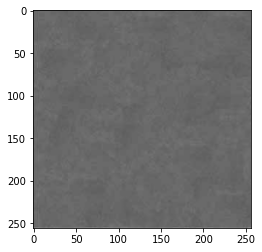

In [ ]:
plt.imshow((train_images[518]))

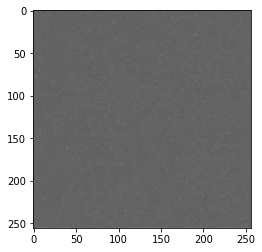

In [ ]:
plt.imshow(train_images[389])

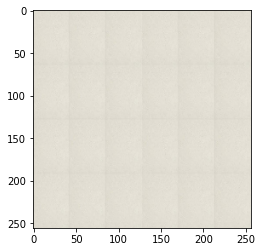

In [ ]:
plt.imshow(train_images[1002])

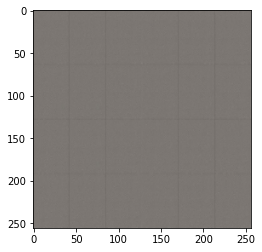

In [ ]:
plt.imshow(train_images[762])

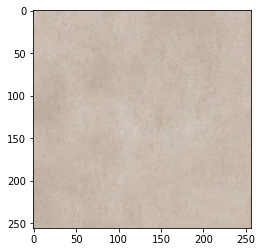

In [ ]:
plt.imshow(train_images[79])

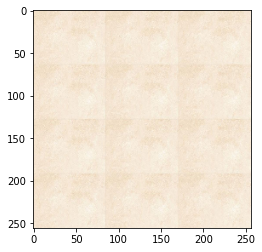

In [ ]:
plt.imshow(train_images[789])

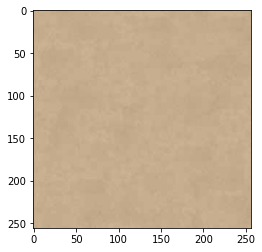

In [ ]:
plt.imshow(train_images[521])

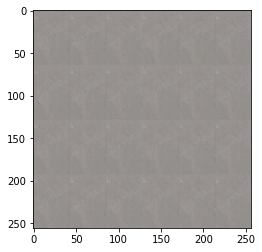

In [ ]:
plt.imshow(train_images[1177])

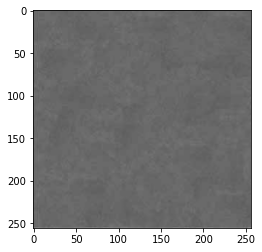

In [ ]:
plt.imshow(train_images[518])

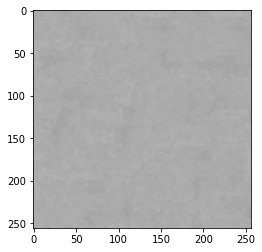

In [ ]:
plt.imshow(train_images[520])

In [ ]:
with open('name.pkl', 'wb') as f:
    pickle.dump(name, f)
# train_img = np.array(train_images)